lab1 (b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. Data Setup =====
X = np.array([
    [-2,  2,  1, -1, -1],
    [-2,  1, -2,  0,  1],
    [ 1,  0, -2,  2, -1]
], dtype=float)

y = np.array([5, 1, 1], dtype=float).reshape(-1, 1)

# ===== 2. Initialization =====
W = np.zeros((5, 1))                # Initial weights
learning_rate = 0.02
num_steps = 200

loss_history = []
weight_history = []

# ===== 3. Gradient Descent =====
for step in range(num_steps):
    pred = X @ W
    error = pred - y
    loss = np.sum(error ** 2)       # Note: no 1/2 or average
    grad = 2 * X.T @ error          # Gradient

    W = W - learning_rate * grad    # Update weights

    loss_history.append(loss)
    weight_history.append(W.copy())  # Store full vector for plotting

weight_history = np.hstack(weight_history)  # shape: (5, num_steps)

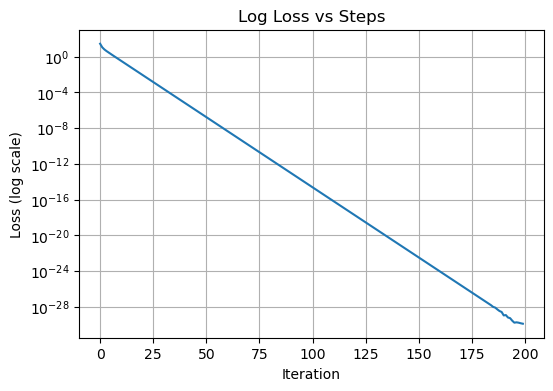

In [2]:
# ===== 4. Plotting =====

# (a) log(Loss) vs step
plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.title("Log Loss vs Steps")
plt.grid(True)
plt.show()

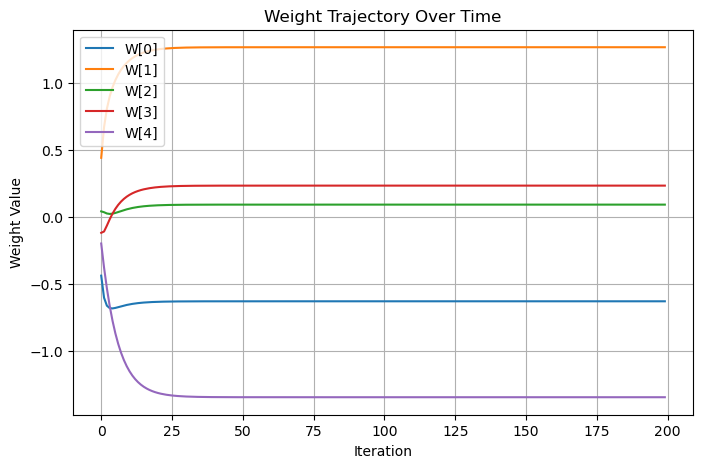

In [3]:
# (b) Weight values over time
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(weight_history[i], label=f"W[{i}]")
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Weight Trajectory Over Time")
plt.legend()
plt.grid(True)
plt.show()

lab1 (c)

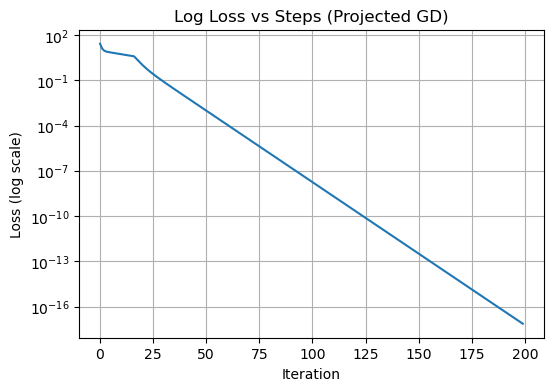

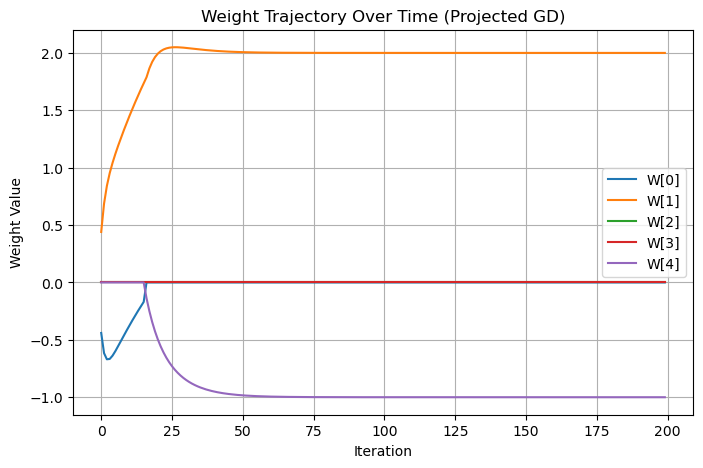

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. Data =====
X = np.array([
    [-2,  2,  1, -1, -1],
    [-2,  1, -2,  0,  1],
    [ 1,  0, -2,  2, -1]
], dtype=float)

y = np.array([5, 1, 1], dtype=float).reshape(-1, 1)

# ===== 2. Initialization =====
W = np.zeros((5, 1))
learning_rate = 0.02
num_steps = 200

loss_history = []
weight_history = []

# ===== 3. Projected Gradient Descent Loop =====
for step in range(num_steps):
    pred = X @ W
    error = pred - y
    loss = np.sum(error ** 2)
    grad = 2 * X.T @ error
    W = W - learning_rate * grad

    # === Projection step: keep only top-2 absolute values ===
    abs_vals = np.abs(W).ravel()
    top2_indices = np.argsort(abs_vals)[-2:]  # largest 2 by magnitude
    mask = np.zeros_like(W)
    mask[top2_indices] = 1
    W = W * mask  # zero out all but top-2 elements

    # Record values
    loss_history.append(loss)
    weight_history.append(W.copy())

weight_history = np.hstack(weight_history)  # shape: (5, num_steps)

# ===== 4. Plotting =====

# (a) Log-loss vs iteration
plt.figure(figsize=(6, 4))
plt.plot(loss_history)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.title("Log Loss vs Steps (Projected GD)")
plt.grid(True)
plt.show()

# (b) Weight trajectory
plt.figure(figsize=(8, 5))
for i in range(5):
    plt.plot(weight_history[i], label=f"W[{i}]")
plt.xlabel("Iteration")
plt.ylabel("Weight Value")
plt.title("Weight Trajectory Over Time (Projected GD)")
plt.legend()
plt.grid(True)
plt.show()


lab1 (d)

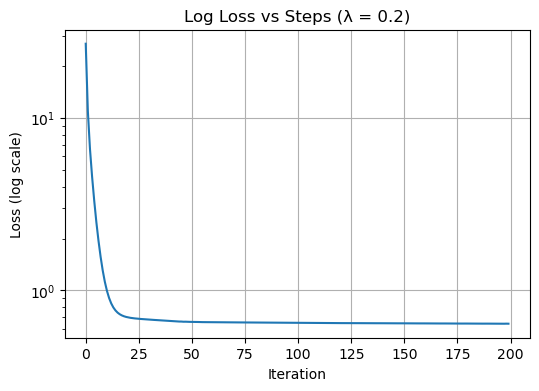

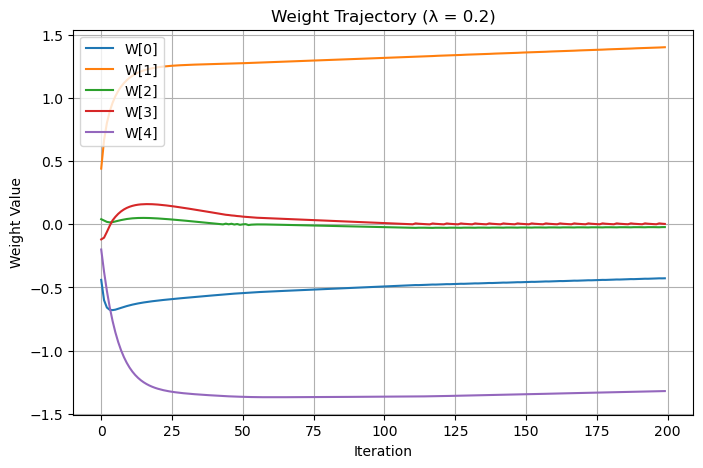

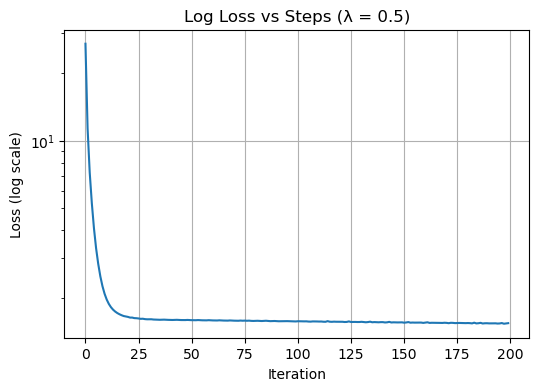

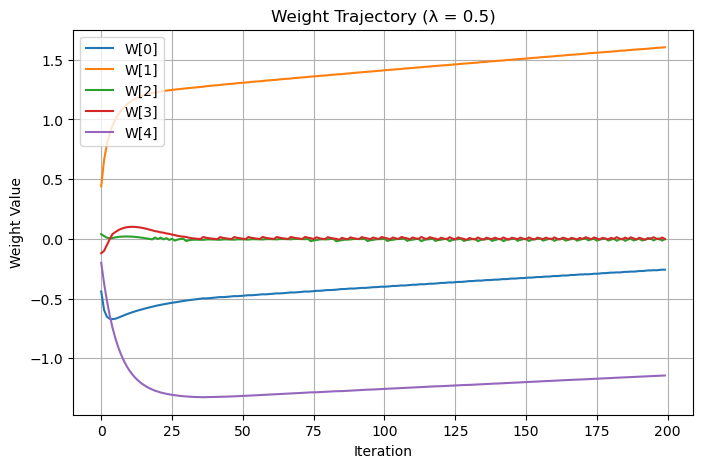

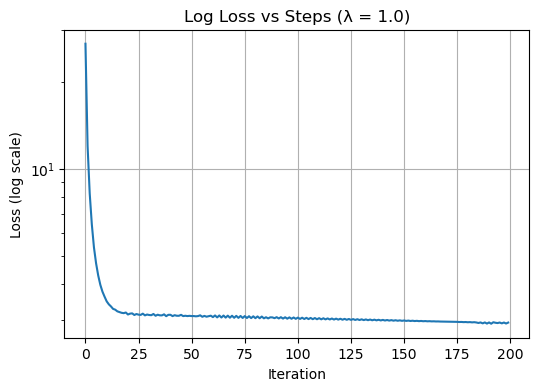

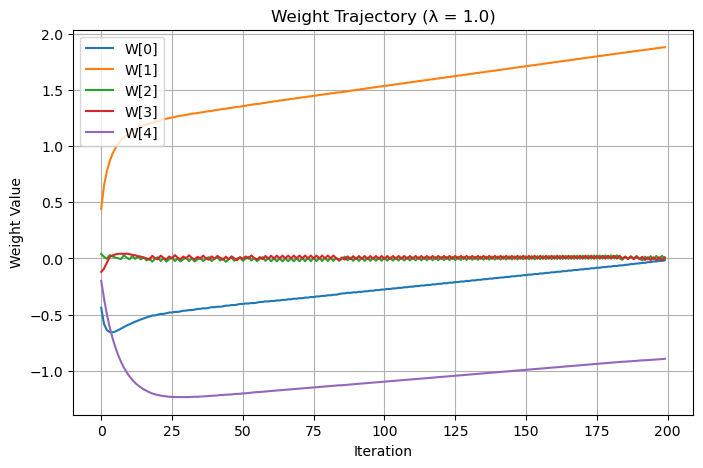

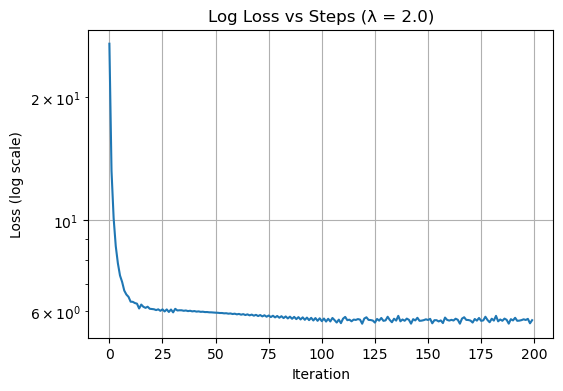

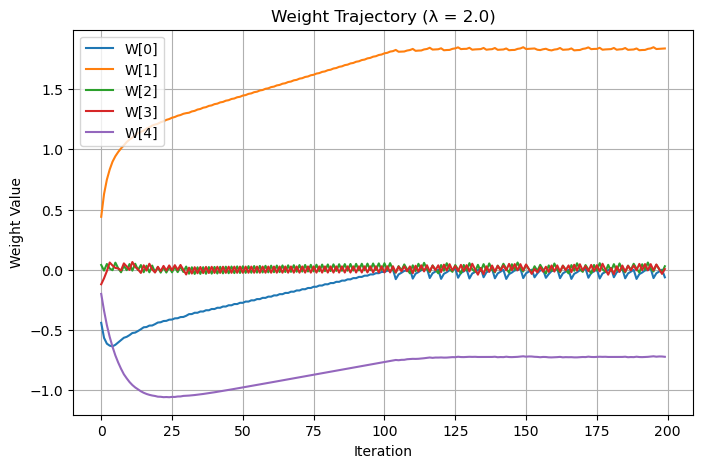

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ===== Data Setup =====
X = np.array([
    [-2,  2,  1, -1, -1],
    [-2,  1, -2,  0,  1],
    [ 1,  0, -2,  2, -1]
], dtype=float)
y = np.array([5, 1, 1], dtype=float).reshape(-1, 1)

# ===== Hyperparameters =====
learning_rate = 0.02
num_steps = 200
lambdas = [0.2, 0.5, 1.0, 2.0]

# ===== Run for each lambda =====
for lam in lambdas:
    W = np.zeros((5, 1))
    loss_history = []
    weight_history = []

    for step in range(num_steps):
        pred = X @ W
        error = pred - y
        loss = np.sum(error ** 2) + lam * np.sum(np.abs(W))  # L1-regularized loss

        grad = 2 * X.T @ error + lam * np.sign(W)  # Subgradient
        W = W - learning_rate * grad

        loss_history.append(loss)
        weight_history.append(W.copy())

    weight_history = np.hstack(weight_history)

    # ==== Plot: Log loss ====
    plt.figure(figsize=(6, 4))
    plt.plot(loss_history)
    plt.yscale("log")
    plt.xlabel("Iteration")
    plt.ylabel("Loss (log scale)")
    plt.title(f"Log Loss vs Steps (λ = {lam})")
    plt.grid(True)
    plt.show()

    # ==== Plot: Weight trajectory ====
    plt.figure(figsize=(8, 5))
    for i in range(5):
        plt.plot(weight_history[i], label=f"W[{i}]")
    plt.xlabel("Iteration")
    plt.ylabel("Weight Value")
    plt.title(f"Weight Trajectory (λ = {lam})")
    plt.legend()
    plt.grid(True)
    plt.show()


Lab1 (e)

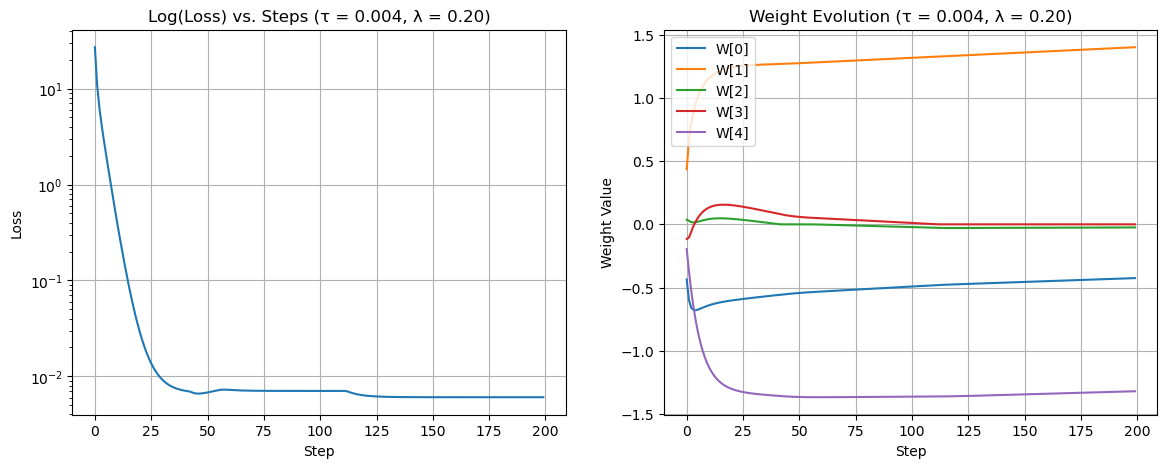

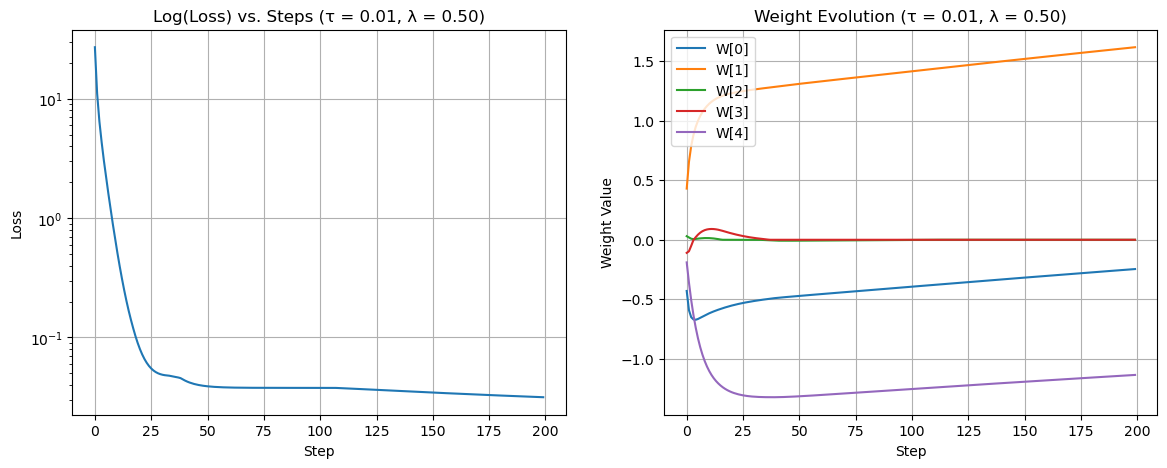

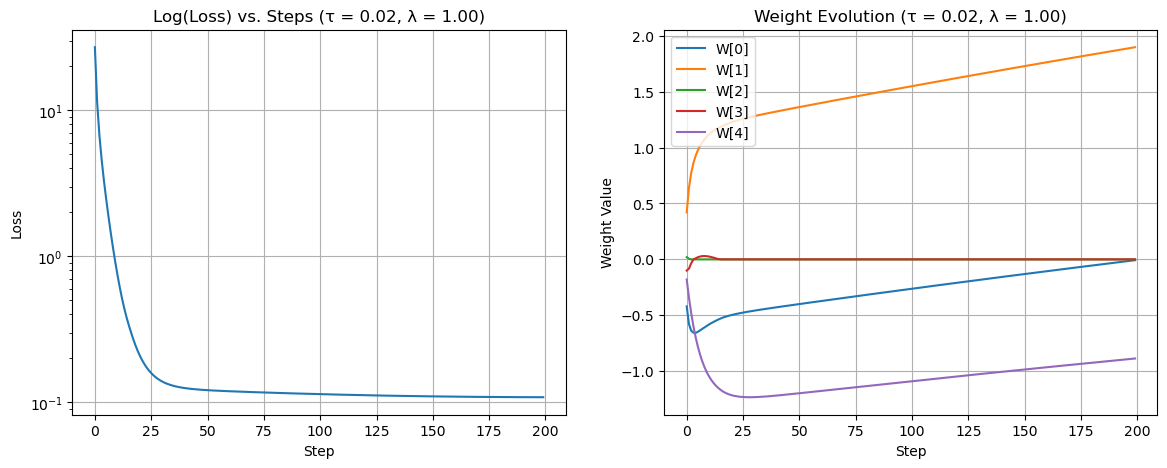

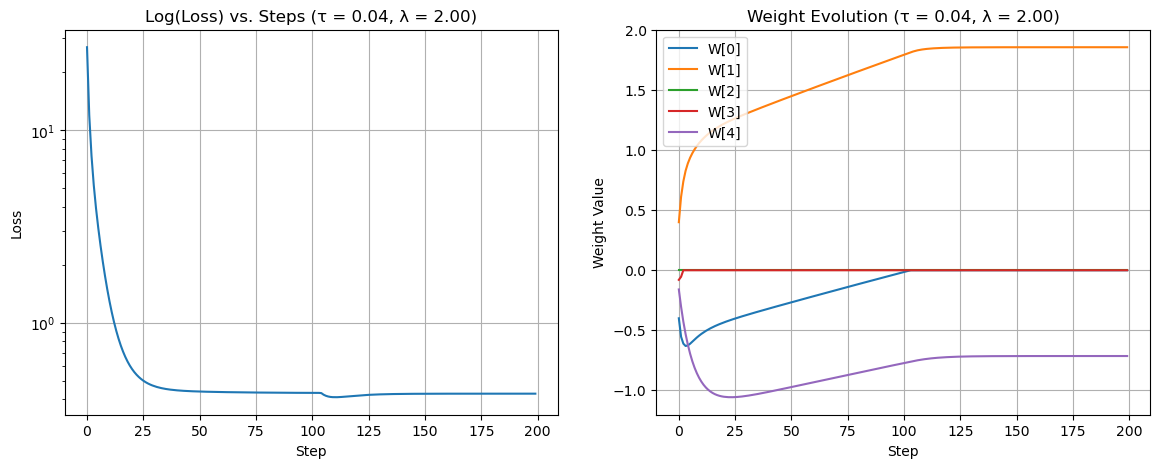

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 1. Soft Thresholding Operator ====
def soft_thresholding(w, tau):
    return np.sign(w) * np.maximum(np.abs(w) - tau, 0)

# ==== 2. Data ====
X = np.array([
    [-2,  2,  1, -1, -1],
    [-2,  1, -2,  0,  1],
    [ 1,  0, -2,  2, -1]
], dtype=float)
y = np.array([5, 1, 1], dtype=float).reshape(-1, 1)

# ==== 3. Settings ====
mu = 0.02  # learning rate
steps = 200
thresholds = [0.004, 0.01, 0.02, 0.04]

# ==== 4. Loop over thresholds ====
for threshold in thresholds:
    lambda_reg = threshold / mu  # λ = τ / μ
    W = np.zeros((5, 1))
    loss_history = []
    W_history = []

    # === Proximal Gradient Descent ===
    for step in range(steps):
        predictions = X @ W
        errors = predictions - y
        loss = np.sum(errors ** 2)
        loss_history.append(loss)

        grad = 2 * X.T @ errors
        W_temp = W - mu * grad
        W = soft_thresholding(W_temp, threshold)

        W_history.append(W.flatten())

    W_history = np.array(W_history)  # Shape: (steps, 5)

    # === Plotting side-by-side ===
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # (1) Log Loss Plot
    ax1.plot(range(steps), loss_history)
    ax1.set_yscale('log')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Log(Loss) vs. Steps (τ = {threshold}, λ = {lambda_reg:.2f})')
    ax1.grid(True)

    # (2) W Trajectory Plot
    for i in range(5):
        ax2.plot(range(steps), W_history[:, i], label=f"W[{i}]")
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Weight Value')
    ax2.set_title(f'Weight Evolution (τ = {threshold}, λ = {lambda_reg:.2f})')
    ax2.legend()
    ax2.grid(True)




Lab(1) f

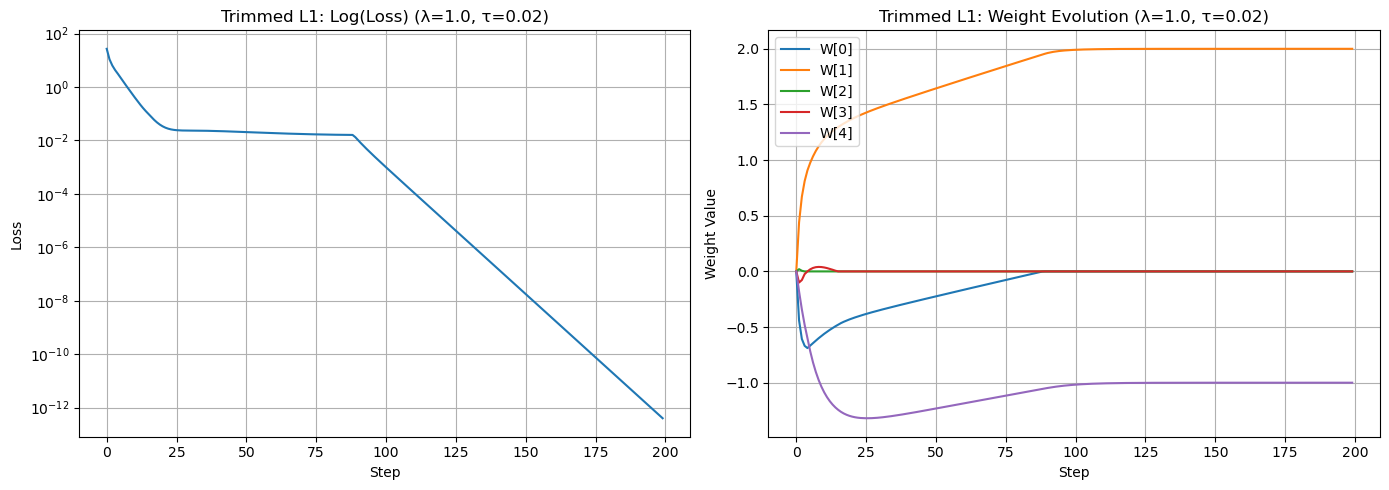

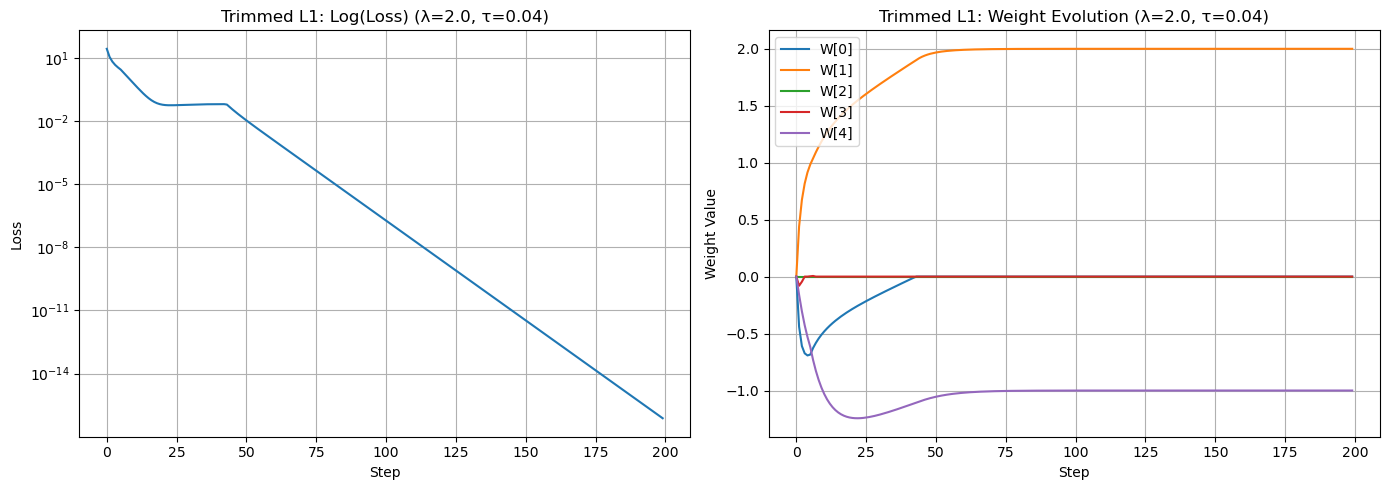

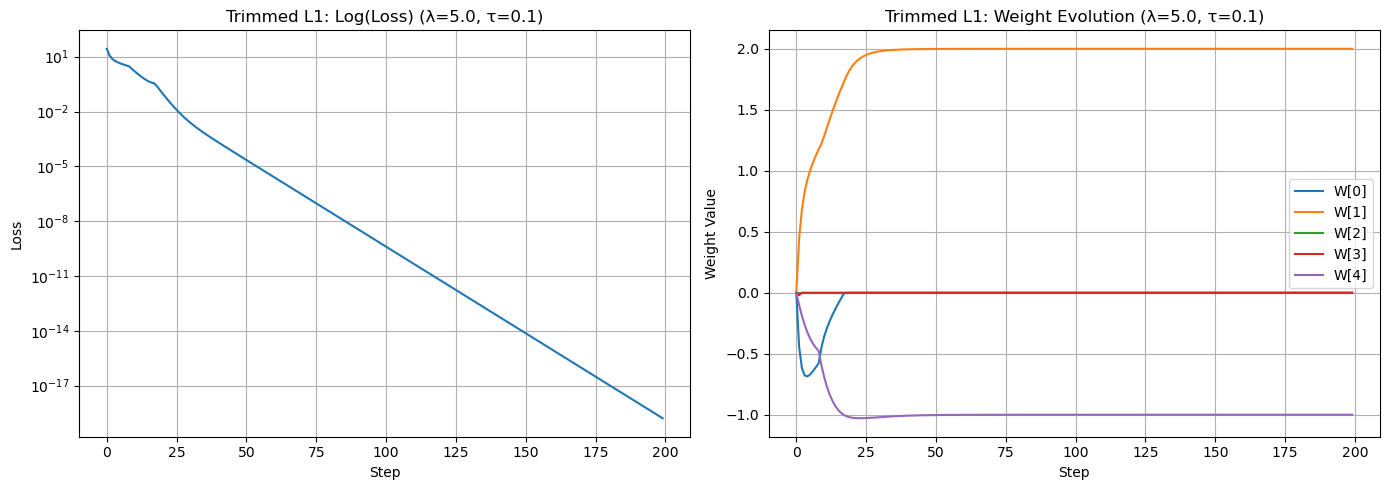

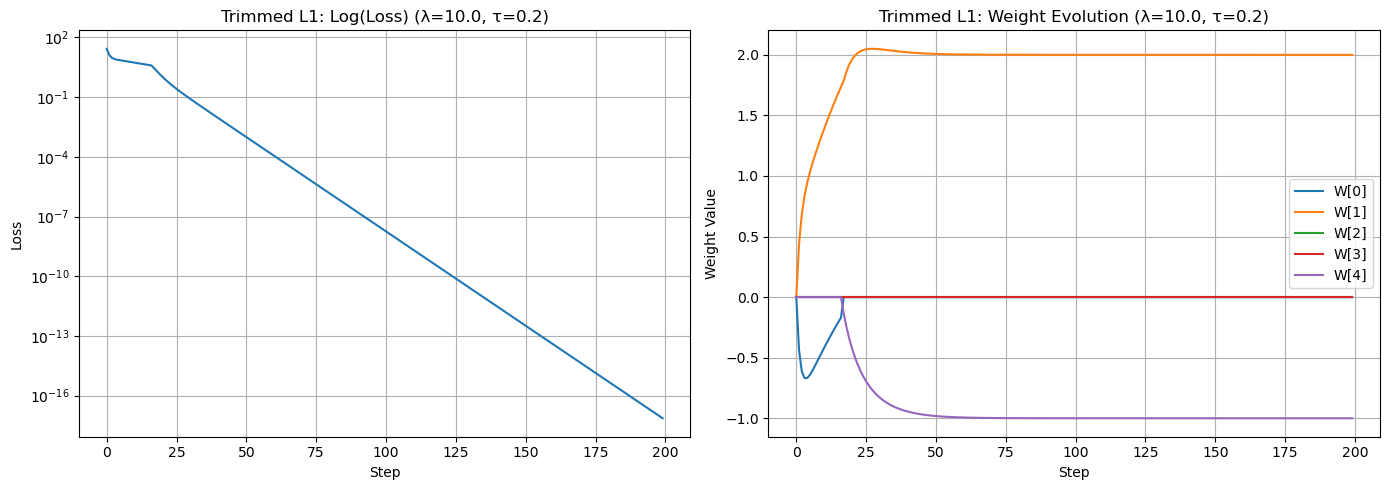

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# ==== 1. Soft Thresholding Function (for selected indices only) ====
def trimmed_soft_thresholding(W, threshold, trim_k=3):
    """Apply soft thresholding only to the trim_k smallest |W| entries"""
    W_new = W.copy()
    abs_W = np.abs(W.flatten())
    indices = np.argsort(abs_W)[:trim_k]  # indices of k smallest |W|
    for idx in indices:
        w_i = W[idx]
        W_new[idx] = np.sign(w_i) * max(abs(w_i) - threshold, 0)
    return W_new

# ==== 2. Data ====
X = np.array([
    [-2,  2,  1, -1, -1],
    [-2,  1, -2,  0,  1],
    [ 1,  0, -2,  2, -1]
], dtype=float)
y = np.array([5, 1, 1], dtype=float).reshape(-1, 1)

# ==== 3. Settings ====
mu = 0.02  # learning rate
steps = 200
lambdas = [1.0, 2.0, 5.0, 10.0]

# ==== 4. Loop over lambda ====
for lam in lambdas:
    tau = mu * lam
    W = np.zeros((5, 1))
    loss_history = []
    W_history = []

    for step in range(steps):
        predictions = X @ W
        errors = predictions - y
        loss = np.sum(errors ** 2)
        loss_history.append(loss)
        W_history.append(W.flatten())

        grad = 2 * X.T @ errors  # gradient of L
        W_temp = W - mu * grad   # gradient descent step

        # Apply trimmed proximal update
        W = trimmed_soft_thresholding(W_temp, tau, trim_k=3)

    W_history = np.array(W_history)  # shape (steps, 5)

    # ==== 5. Plotting ====
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss plot
    ax1.plot(range(steps), loss_history)
    ax1.set_yscale('log')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'Trimmed L1: Log(Loss) (λ={lam}, τ={tau})')
    ax1.grid(True)

    # Weight evolution
    for i in range(5):
        ax2.plot(range(steps), W_history[:, i], label=f'W[{i}]')
    ax2.set_xlabel('Step')
    ax2.set_ylabel('Weight Value')
    ax2.set_title(f'Trimmed L1: Weight Evolution (λ={lam}, τ={tau})')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()
